#**CLASS 7 (19th Aug 2023)(HyperParameter(Keras tuner))**

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.corr()['Outcome']

,Outcome
Pregnancies,0.221898
Glucose,0.466581
BloodPressure,0.065068
SkinThickness,0.074752
Insulin,0.130548
BMI,0.292695
DiabetesPedigreeFunction,0.173844
Age,0.238356
Outcome,1.000000


<Axes: >

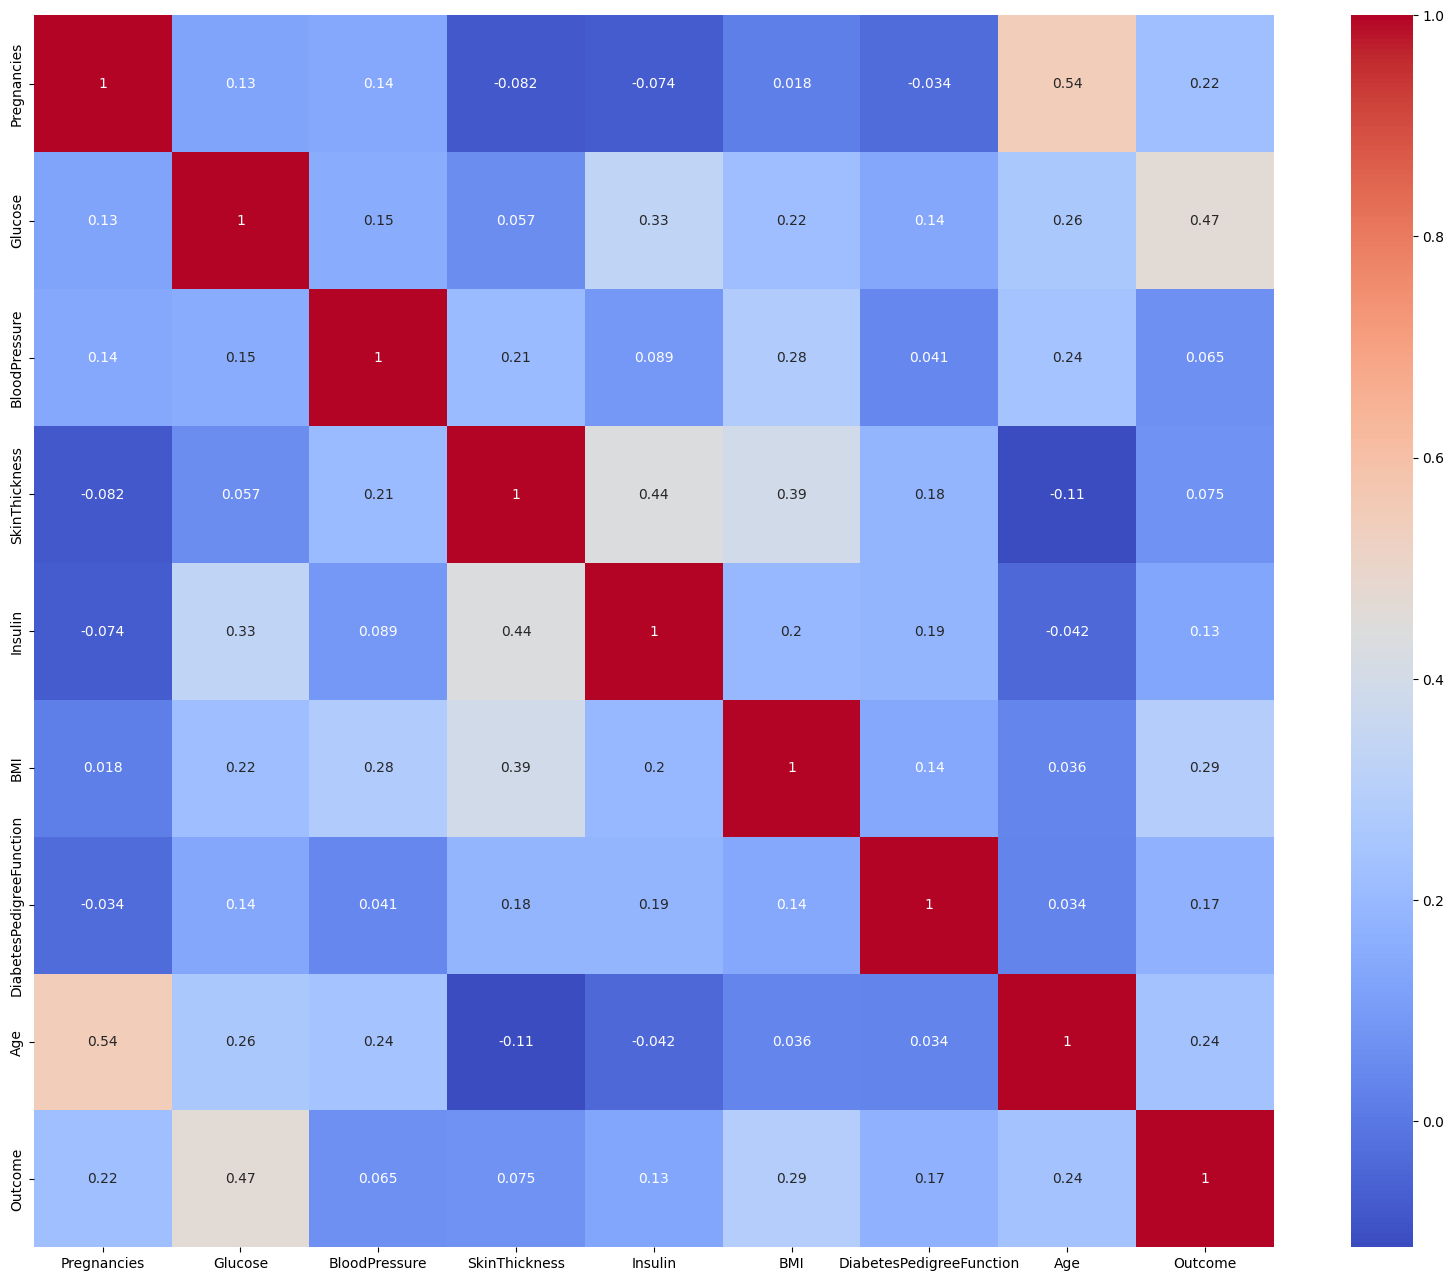

In [4]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


In [5]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
df['Glucose'] = np.where(df['Glucose']==0, df['Glucose'].mean(), df['Glucose'])
df['BloodPressure'] = np.where(df['BloodPressure']==0, df['BloodPressure'].mean(), df['BloodPressure'])
df['SkinThickness'] = np.where(df['SkinThickness']==0, df['SkinThickness'].mean(), df['SkinThickness'])
df['Insulin'] = np.where(df['Insulin']==0, df['Insulin'].median(), df['Insulin'])
df['BMI'] = np.where(df['BMI']==0, df['BMI'].mean(), df['BMI'])

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,94.652344,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,105.547598,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
# split the data into x and y
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [12]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,30.5,33.6,0.627,50
1,1,85.0,66.0,29.000000,30.5,26.6,0.351,31
2,8,183.0,64.0,20.536458,30.5,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.0,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.0,43.1,2.288,33


In [13]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [14]:
# Feature scaling is required with ind variable as we will use optimization method
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7
0,0.639947,0.865276,-0.021044,0.872057,-0.608201,0.167255,0.468492,1.425995
1,-0.844885,-1.205989,-0.516583,0.248678,-0.608201,-0.851535,-0.365061,-0.190672
2,1.233880,2.015979,-0.681762,-0.630654,-0.608201,-1.331821,0.604397,-0.105584
3,-0.844885,-1.074480,-0.516583,-0.374700,-0.006185,-0.633222,-0.920763,-1.041549
4,-1.141852,0.503626,-2.663916,0.872057,0.695378,1.549899,5.484909,-0.020496


In [15]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.476301e-17,-1.595946e-16,1.156482e-17,2.868076e-16,2.602085e-17,-3.168762e-16,2.451743e-16,1.931325e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-2.553955e+00,-3.985352e+00,-2.037044e+00,-7.646304e-01,-2.074083e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-7.210503e-01,-6.817623e-01,-6.306536e-01,-6.082010e-01,-7.205473e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.539182e-01,-2.104440e-02,-3.747004e-01,-6.010905e-01,-6.561083e-02,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.104773e-01,6.396735e-01,5.603676e-01,3.090444e-01,6.038797e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.542014e+00,4.108443e+00,7.521430e+00,7.123206e+00,5.042893e+00,5.883565e+00,4.063716e+00


In [16]:
y.value_counts()

,count
Outcome,
0,500
1,268


In [17]:
# split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101,
                                                    stratify=y)

In [18]:
# MultiLayer Perceptron Model

import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras import Sequential

In [21]:

# model = Sequential()
# # How many hidden layer
# model.add(Dense(#how_much_neuron , activation=which_activation, input_dim=given))
# model.add(Dropout(0.25))
# model.add(BatchNormalization())
# model.add(Dense(#how_much_neuron, activation=which_activation))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer="which_optimizer", loss='binary_crossentropy', metrics =['accuracy'])
# model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size="how_much", epochs="how_much")


In [20]:
!pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.4 MB/s eta 0:00:00


In [22]:
import keras_tuner as kt

In [23]:
def build_model(hp):
  model = Sequential()
  counter = 0

  for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
    if counter == 0:
      model.add(Dense(hp.Int('neuron'+str(i),min_value = 8, max_value = 128, step = 8),
                      activation = hp.Choice('activation'+str(i),
                                             values=['relu','leaky_relu']),
                      input_dim = 8))
      model.add(Dropout(hp.Choice('dropout' + str(i), values=[0.1,0.2,0.3,0.4,0.5])))
    else:
      model.add(Dense(hp.Int('unit' + str(i),min_value=8,max_value=128,step=8),
                      activation = hp.Choice('activation' + str(i),
                                             values=['relu','leaky_relu'])))
      model.add(Dropout(hp.Choice('dropout' + str(i), values = [0.1,0.2,0.3,0.4,0.5])))
    counter +=1
  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer = hp.Choice('optimizer',values=['rmsprop','adam']),
                loss='binary_crossentropy',metrics=['accuracy'])
  return model



In [24]:
# max_trials=5 is nothing it will iterate 5 times
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5, directory='my_own_dir', project_name='hyperparam_diab')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
tuner.search(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Trial 5 Complete [00h 00m 04s]
val_loss: 0.5421373844146729

Best val_loss So Far: 0.5129368901252747
Total elapsed time: 00h 00m 24s


In [26]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 3,
 'neuron0': 48,
 'activation0': 'leaky_relu',
 'dropout0': 0.1,
 'optimizer': 'adam',
 'unit1': 80,
 'activation1': 'leaky_relu',
 'dropout1': 0.2,
 'unit2': 128,
 'activation2': 'relu',
 'dropout2': 0.5,
 'unit3': 48,
 'activation3': 'relu',
 'dropout3': 0.4,
 'unit4': 48,
 'activation4': 'relu',
 'dropout4': 0.5,
 'unit5': 56,
 'activation5': 'relu',
 'dropout5': 0.4,
 'unit6': 128,
 'activation6': 'relu',
 'dropout6': 0.3,
 'unit7': 32,
 'activation7': 'relu',
 'dropout7': 0.4,
 'unit8': 56,
 'activation8': 'relu',
 'dropout8': 0.4,
 'unit9': 88,
 'activation9': 'leaky_relu',
 'dropout9': 0.4}

In [27]:
model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [28]:
model.fit(x_train, y_train, batch_size=32, epochs=200,initial_epoch=5,
          validation_data=(x_test, y_test))

Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.7727 - loss: 0.4503 - val_accuracy: 0.7552 - val_loss: 0.5190
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7757 - loss: 0.4413 - val_accuracy: 0.7604 - val_loss: 0.5166
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7735 - loss: 0.4371 - val_accuracy: 0.7656 - val_loss: 0.5222
Epoch 9/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7705 - loss: 0.4245 - val_accuracy: 0.7708 - val_loss: 0.5304
Epoch 10/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7563 - loss: 0.4435 - val_accuracy: 0.7604 - val_loss: 0.5233
Epoch 11/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7757 - loss: 0.4352 - val_accuracy: 0.7760 - val_loss: 0.5336
Epoch 12/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7860 - loss: 0.4117 - val_accuracy: 0.7708 - val_loss: 0.5295
Epoch 13/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7813 - loss: 0.4110 - val_accuracy: 0.781

In [ ]:
# ----> less data is there thats why not getting proper output if data will be huge then it will work good
#         because Deep learning work good on huge data.